In [1]:
#28 | {"<5":266,"5-20":4184,"21-60":3597,"61-240":2492,">240":892}
import pandas as pd
import numpy as np

all_data = pd.read_csv('/home/rayan/Workspace/assip/data/Safegraph/dwell_data.csv')
all_data.head()
print(all_data.shape)

(12245, 11)


In [2]:
for index, row in enumerate(all_data['raw_visitor_counts']):
    if row < 30:
        all_data = all_data.drop([index])
print(all_data.shape)

(4130, 11)


In [3]:
dwell_df = all_data[['median_dwell', 'bucketed_dwell_times']]
for index, row in enumerate(dwell_df['bucketed_dwell_times']):
    dwell_df['bucketed_dwell_times'][index] = row[1:len(row)-1]
dwell_df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,median_dwell,bucketed_dwell_times
0,28.0,"""<5"":266,""5-20"":4184,""21-60"":3597,""61-240"":249..."
1,21.0,"""<5"":135,""5-20"":2414,""21-60"":2058,""61-240"":612..."
2,22.0,"""<5"":109,""5-20"":2009,""21-60"":1858,""61-240"":630..."
3,21.0,"""<5"":85,""5-20"":1569,""21-60"":1391,""61-240"":248,..."
4,63.0,"""<5"":80,""5-20"":1268,""21-60"":1267,""61-240"":1611..."


In [6]:
bucket_labels = list(map(str, dwell_df['bucketed_dwell_times'][0].split(',')))
for index,label in enumerate(bucket_labels):
    bucket_labels[index] = label[label.index('"')+1:label.index(':')-1]
bucket_labels.append('median_dwell')
buckets_df = pd.DataFrame(columns=[bucket_labels]) 
print(buckets_df)

for dwell_i in range(len(dwell_df['bucketed_dwell_times'])):
    bucket_values = list(map(str, dwell_df['bucketed_dwell_times'][dwell_i].split(',')))
    for index, val in enumerate(bucket_values):
        bucket_values[index] = int(val[val.index(':')+1:])
    bucket_values.append(dwell_df['median_dwell'][dwell_i])
    buckets_df.loc[dwell_i] = bucket_values

buckets_df = buckets_df.rename(columns={'<5': '0-5', '>240': '240-960'}) #----------------change cap here

Empty DataFrame
Columns: [(<5,), (5-20,), (21-60,), (61-240,), (>240,), (median_dwell,)]
Index: []


In [7]:
print(buckets_df)

        0-5    5-20   21-60  61-240 240-960 median_dwell
0     266.0  4184.0  3597.0  2492.0   892.0         28.0
1     135.0  2414.0  2058.0   612.0   176.0         21.0
2     109.0  2009.0  1858.0   630.0   195.0         22.0
3      85.0  1569.0  1391.0   248.0   104.0         21.0
4      80.0  1268.0  1267.0  1611.0  1183.0         63.0
5      53.0  1520.0  1415.0   366.0   120.0         21.0
6     111.0  1391.0  1347.0  2049.0   680.0         60.0
7      76.0  1376.0  1038.0   446.0   100.0         21.0
8      63.0  1071.0  1167.0   865.0   257.0         36.0
9      70.0  1378.0   826.0   411.0   156.0         20.0
10     58.0   902.0   711.0   384.0   128.0         22.0
11     36.0   953.0   762.0   185.0    53.0         21.0
12     12.0   513.0   737.0   711.0    63.0         42.0
13     55.0   736.0   636.0   484.0   304.0         33.0
14     61.0  1058.0   708.0   389.0   125.0         21.0
15     50.0   765.0   804.0   722.0   196.0         39.0
16     29.0   498.0   688.0   8

In [38]:
for col in buckets_df:
    print(col)

('0-5',)
('5-20',)
('21-60',)
('61-240',)
('240-960',)
('median_dwell',)


In [118]:
def fill_buckets(lower, upper, num):
    print(np.random.uniform(low=lower, high=upper, size=(num,1)).shape)
    return np.random.uniform(low=lower, high=upper, size=(num,1))


#input distribution as two arrays, nums: the actual number values, buckets: list of the section ranges

def get_dwell_time(nums, buckets): 
    filled_arr = np.empty([1,1])
    for index, bucket in enumerate(buckets): 
        lower, upper = map(int, bucket.split('-'))
        print(filled_arr.shape)
        filled_arr = np.concatenate((filled_arr, fill_buckets(lower, upper, int(nums[index]))))
    return np.array(filled_arr)

In [119]:
test_nums = list(buckets_df.loc[0].drop('median_dwell'))
test_buckets = [str(i)[str(i).index("'")+1:str(i).index(",")-1] for i in list(buckets_df.drop(
            'median_dwell', axis=1).columns)]
test_fit = get_dwell_time(test_nums, test_buckets)
    

(1, 1)
(266, 1)
(267, 1)
(4184, 1)
(4451, 1)
(3597, 1)
(8048, 1)
(2492, 1)
(10540, 1)
(892, 1)


In [130]:
print(test_fit.shape)
test_fit = test_fit[~np.isnan(test_fit)]
print(test_fit.shape)

(11431,)
(11431,)


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0003827] [loc=97.707 scale=169.479] 
[distfit] >[expon     ] [RSS: 0.0001327] [loc=0.017 scale=97.691] 
[distfit] >[pareto    ] [RSS: 0.0000655] [loc=-2.079 scale=2.096] 
[distfit] >[dweibull  ] [RSS: 0.0001128] [loc=16.030 scale=49.075] 
[distfit] >[t         ] [RSS: 0.0001218] [loc=21.897 scale=17.645] 
[distfit] >[genextreme] [RSS: 0.0000269] [loc=22.130 scale=24.772] 
[distfit] >[gamma     ] [RSS: 0.0000801] [loc=0.017 scale=148.924] 
[distfit] >[lognorm   ] [RSS: 0.0000184] [loc=-0.081 scale=38.402] 
[distfit] >[beta      ] [RSS: 0.0000811] [loc=0.017 scale=7319.244] 
[distfit] >[uniform   ] [RSS: 0.0004669] [loc=0.017 scale=959.821] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


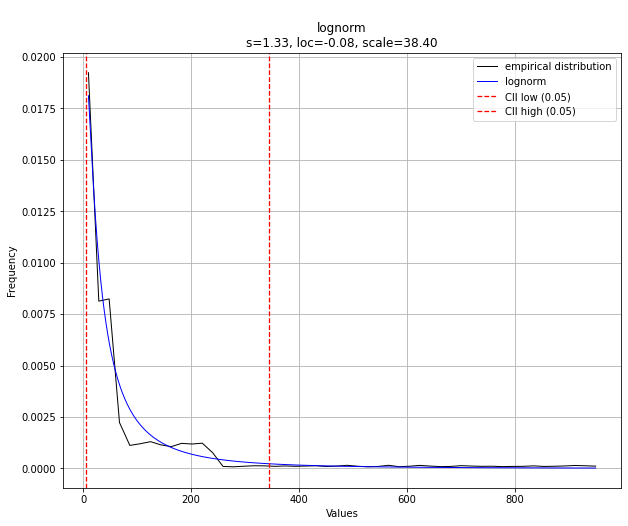

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f00f5c464a8>)

In [131]:
from distfit import distfit

dist = distfit()
dist.fit_transform(test_fit)
dist.plot()

[distfit] >plot summary..


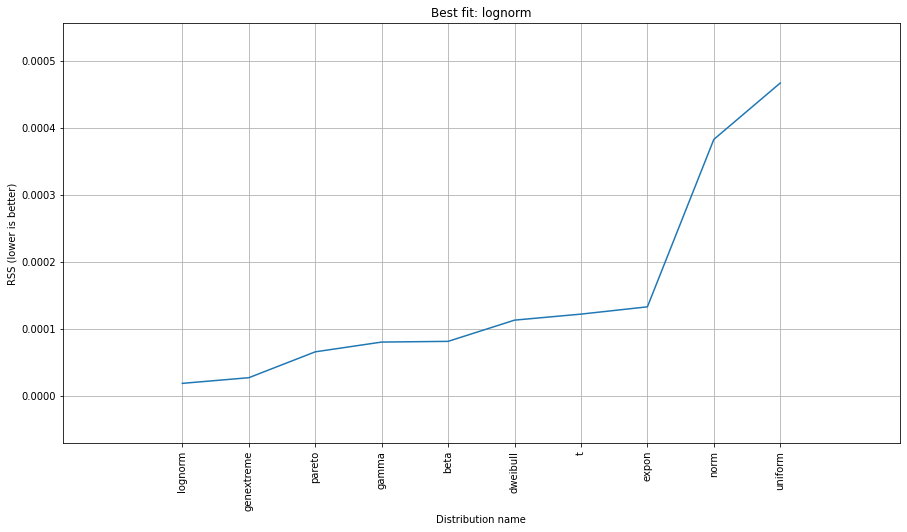

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f00f4f7ecf8>)

In [132]:
dist.plot_summary()

In [137]:
dist.model

{'CII_max_alpha': 344.45766053791425,
 'CII_min_alpha': 4.1997151883588195,
 'RSS': 1.842052574520847e-05,
 'arg': (1.3339156821156237,),
 'distr': <scipy.stats._continuous_distns.lognorm_gen at 0x7f00f6ba27f0>,
 'loc': -0.08054105922535619,
 'name': 'lognorm',
 'params': (1.3339156821156237, -0.08054105922535619, 38.40197638035801),
 'scale': 38.40197638035801}

In [158]:
arg, loc, scale = float((dist.model['arg'])[0]), dist.model['loc'], dist.model['scale']
arg

1.3339156821156237

In [135]:
dist.summary

,distr,RSS,LLE,loc,scale,arg
0,lognorm,1.84205e-05,NaN,-0.0805411,38.402,"(1.3339156821156237,)"
1,genextreme,2.68557e-05,NaN,22.1299,24.7716,"(-0.9764299744131386,)"
2,pareto,6.5503e-05,NaN,-2.07921,2.09579,"(0.3186444603228751,)"
3,gamma,8.00791e-05,NaN,0.0165841,148.924,"(0.6580030489784636,)"
4,beta,8.11295e-05,NaN,0.0165841,7319.24,"(0.6399365292195222, 46.85558899401104)"
5,dweibull,0.000112821,NaN,16.0295,49.075,"(0.5742987879575867,)"
6,t,0.000121814,NaN,21.8973,17.6445,"(0.7774388500105776,)"
7,expon,0.000132692,NaN,0.0165841,97.6909,()
8,norm,0.000382697,NaN,97.7075,169.479,()
9,uniform,0.000466914,NaN,0.0165841,959.821,()


In [140]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt

output_dwell_time = lognorm.rvs(1.3339156821156237, loc=-0.08054105922535619, scale=38.40197638035801, size=100)
print(output_dwell_time)

[ 84.69124094 244.20562771   5.99182429  11.25834617  11.55685643
   8.6096807   71.55433135   3.20646703  22.54114707  62.24365916
  10.51643068   6.96000927  45.12525499 106.09375836  67.86593967
  52.11944772   9.79209246 273.67849175 236.2532707    8.75493339
 107.85111898   2.324956     5.68898152 509.810091    40.20416538
 188.20618097   9.34937761   9.01517365  76.63170622  25.08300001
  76.74814142  32.24322132 129.54403412 381.17972607  95.90300491
 410.99746008  16.66110035   6.46751785 303.84491301  45.64315072
  18.6826048    1.6018752   15.6000436   43.66985854  32.20733721
  13.11411768  11.58408169  22.03931497 177.59787263 102.91573994
 150.47831096 123.59639532   8.71907204  12.94229328  82.32134639
  12.13246825   4.24001222  52.6259074  330.96201948  11.16997778
 150.77605256  88.11081411  23.10108189 378.91779791  69.65277642
 149.94505487  31.28780728  10.60233741 542.02037708  18.12451902
  26.36797962  56.36311723   5.66550974   5.37956521  38.81264239
 125.28632

In [160]:
import numpy as np
from distfit import distfit
from scipy.stats import lognorm

def fill_buckets(lower, upper, num):
    return np.random.uniform(low=lower, high=upper, size=(num,1))

#input distribution as two arrays:
#nums: containing the numbers of people in each bucket_dwell range 
#buckets: containing the strings of the ranges of each bucket_dwell range

def get_dwell_time(nums, buckets): 
    
    filled_arr = np.empty([1,1])
    for index, bucket in enumerate(buckets): 
        lower, upper = map(int, bucket.split('-'))
        filled_arr = np.concatenate((filled_arr, np.random.uniform(low=lower, high=upper, size=(int(nums[index]), 1))))
        
    filled_arr = filled_arr[~np.isnan(filled_arr)]

    dist = distfit()
    dist.fit_transform(filled_arr)
    arg, loc_v, scale_v = float((dist.model['arg'])[0]), dist.model['loc'], dist.model['scale']
    output_dwell_time = lognorm.rvs(arg, loc=loc_v, scale=scale_v, size=1)
                                    
    return output_dwell_time

print(get_dwell_time(test_nums, test_buckets))

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0003836] [loc=96.747 scale=167.766] 
[distfit] >[expon     ] [RSS: 0.0001318] [loc=0.009 scale=96.738] 
[distfit] >[pareto    ] [RSS: 0.0000645] [loc=-2.086 scale=2.095] 
[distfit] >[dweibull  ] [RSS: 0.0001105] [loc=15.887 scale=48.845] 
[distfit] >[t         ] [RSS: 0.0001126] [loc=21.572 scale=17.270] 
[distfit] >[genextreme] [RSS: 0.0000231] [loc=22.008 scale=24.672] 
[distfit] >[gamma     ] [RSS: 0.0000782] [loc=0.009 scale=147.954] 
[distfit] >[lognorm   ] [RSS: 0.0000162] [loc=-0.163 scale=38.221] 
[distfit] >[beta      ] [RSS: 0.0000764] [loc=0.009 scale=23385.779] 
[distfit] >[uniform   ] [RSS: 0.0004694] [loc=0.009 scale=959.171] 
[distfit] >Compute confidence interval [parametric]
[29.10443717]
